# Diversity in Silicon Valley

#### The data has been sourced from [Kaggle](https://www.kaggle.com/rtatman/silicon-valley-diversity-data) and collected by [Reveal](https://www.revealnews.org/svdiversity) and this analysis is meant to give insight into the people working at these 23 silicon valley companies

In [1]:
# importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import operator
import numpy as np
%matplotlib inline

In [2]:
# reading the file into a pandas dataframe
csvPath = "Diversity.csv"
dataset = pd.read_csv(csvPath)

#### Before doing any analysis on the data itself, let us look at the data

In [3]:
dataset.company.unique()

array(['23andMe', 'Adobe', 'Airbnb', 'Apple', 'Cisco', 'eBay', 'Facebook',
       'Google', 'HP Inc.', 'HPE', 'Intel', 'Intuit', 'LinkedIn', 'Lyft',
       'MobileIron', 'Nvidia', 'Pinterest', 'Salesforce', 'Square',
       'Twitter', 'Uber', 'View'], dtype=object)

#### So 23 Silicon Valley companies

In [4]:
dataset.gender.unique()

array(['male', 'female', nan], dtype=object)

#### We see that we have a third 'nan' gender that might affect our analysis, let's take care of it right now

In [5]:
dataset.replace(["female", "male"], [0, 1], inplace=True)
dataset.drop(dataset[np.isnan(dataset["gender"])].index, inplace = True)
dataset.gender.unique()

array([ 1.,  0.])

In [6]:
dataset.race.unique()

array(['Latino', 'White', 'Black_or_African_American',
       'Native_Hawaiian_or_Pacific_Islander', 'Asian',
       'American_Indian_Alaskan_Native', 'Two_or_more_races'], dtype=object)

In [7]:
dataset.job_category.unique()

array(['Executive/Senior officials & Mgrs', 'First/Mid officials & Mgrs',
       'Professionals', 'Technicians', 'Sales workers',
       'Administrative support', 'Craft workers', 'operatives',
       'laborers and helpers', 'Service workers', 'Totals',
       'Previous_totals'], dtype=object)

#### Let us remove totals and previous totals for now, since we don't want double/ previous year's data

In [8]:
dataset.drop(dataset[dataset['job_category'] == 'Totals'].index, inplace = True)
dataset.drop(dataset[dataset['job_category'] == 'Previous_totals'].index, inplace = True)

In [9]:
dataset['count'].unique()

array(['0', '1', '7', '5', '9', '30', '61', '2', '23', '3', '4', '18',
       '37', '22', '6', '25', '51', '75', '33', '8', '50', '60', '16',
       '38', '56', '1197', '1325', '742', '96', '26', '15', '310', '673',
       '115', '10', '534', '403', '266', '119', '244', '392', '31', '13',
       '24', '46', '103', '352', '91', '14', '279', '20', '214', '138',
       '12', '171', '411', '799', '1709', '2562', '672', '132', '149',
       '382', '617', '1260', '666', '97', '73', '3903', '9012', '7646',
       '8414', '1948', '57', '68', '172', '273', '1382', '1937', '324',
       '11', '34', '107', '1389', '6972', '725', '1031', '338', '44', '32',
       '48', '55', '287', '386', '78', '1441', '2635', '2696', '3622',
       '1774', '116', '127', '1242', '1043', '423', '17', '500', '2650',
       '269', '579', '498', '90', '215', '241', '94', '180', '898', '187',
       '89', '72', '104', '179', '2768', '9764', '2718', '85', '614',
       '117', '53', '1259', '8207', '173', '19', '162', '3

#### All of these counts are strings instead of ints, and there is a 'na' count that we don't want. So lets clean up this column

In [10]:
dataset.drop(dataset[dataset['count'] == 'na'].index, inplace = True)
dataset['count'] = dataset['count'].astype(int)

#### Lets also convert the company names from strings to numbers

In [11]:
companies = ['23andMe', 'Adobe', 'Airbnb', 'Apple', 'Cisco', 'eBay', 'Facebook',
       'Google', 'HP Inc.', 'HPE', 'Intel', 'Intuit', 'LinkedIn', 'Lyft',
       'MobileIron', 'Nvidia', 'Pinterest', 'Salesforce', 'Square',
       'Twitter', 'Uber', 'View']
dataset.replace(companies, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21], inplace=True)

### Now let us start with the analysis
#### Let us plot the average gender ratio of all the companies

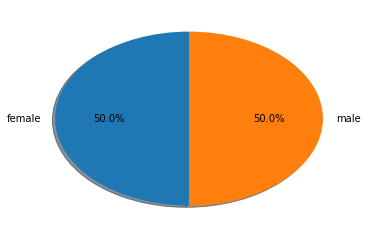

In [12]:
females = dataset.gender.sum()
males = dataset.gender.count() - females
sizes = [females, males]
labels = ["female", "male"]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90);
# ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

### Surprisingly the gender ratio is perfectly one, is this incidentally being balanced out by the data? Lets see

#### Let's plot the gender distribution for all the companies

/Users/adityaarora/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


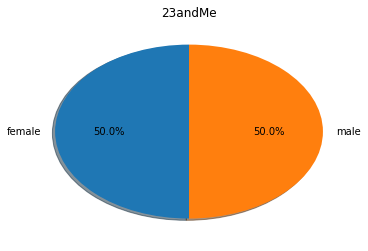

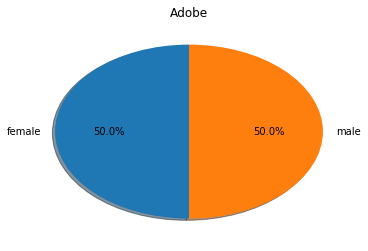

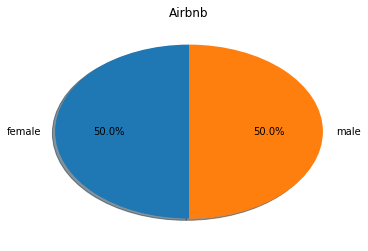

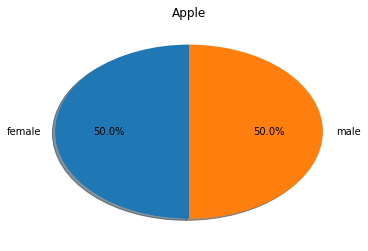

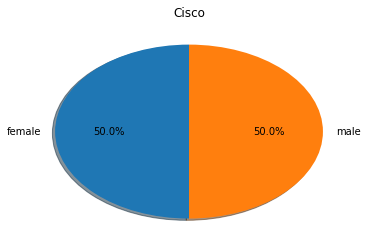

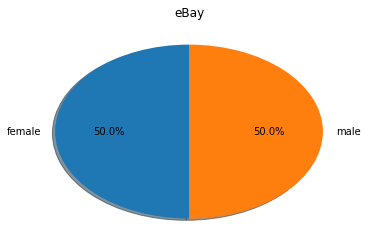

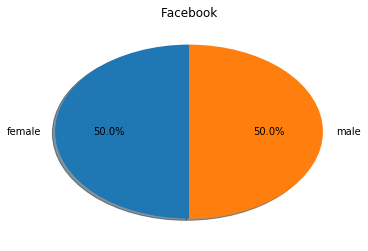

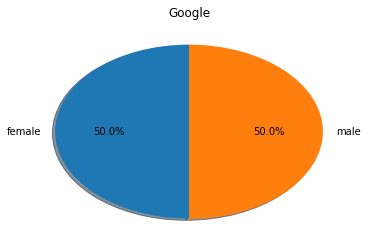

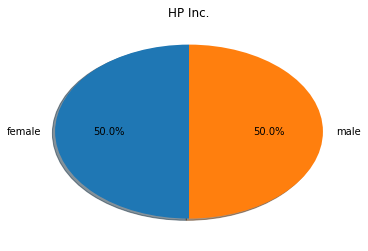

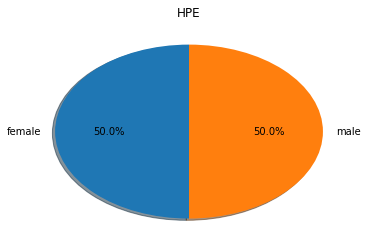

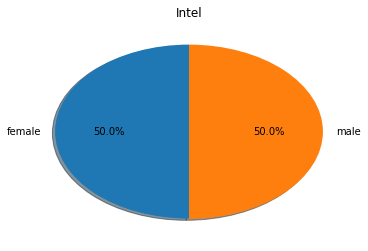

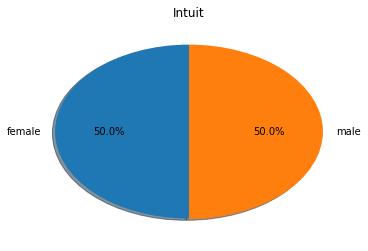

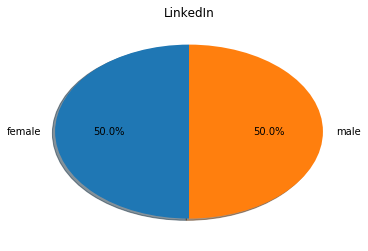

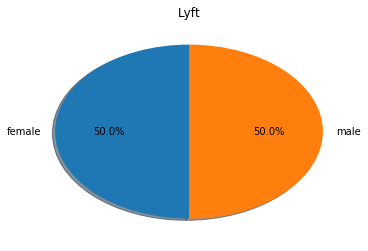

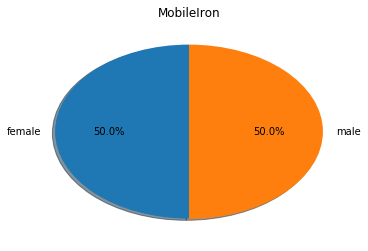

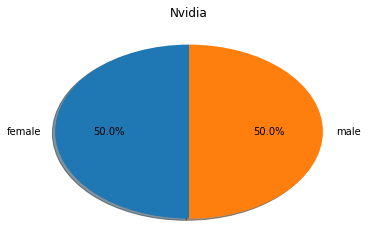

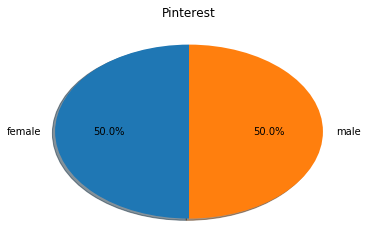

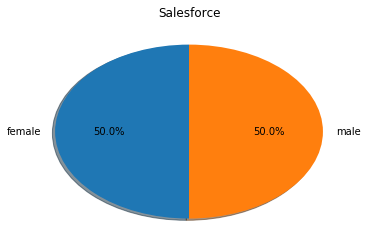

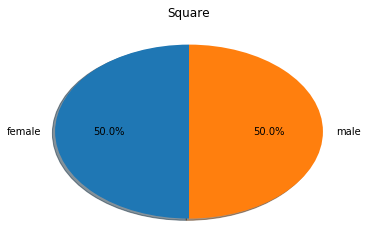

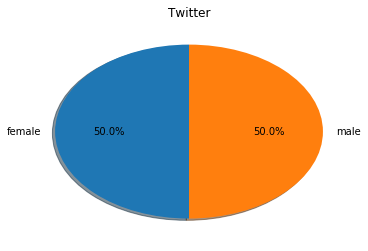

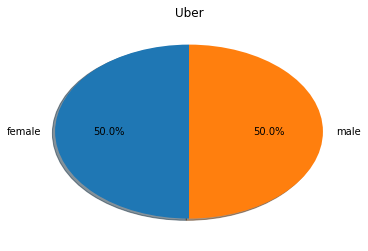

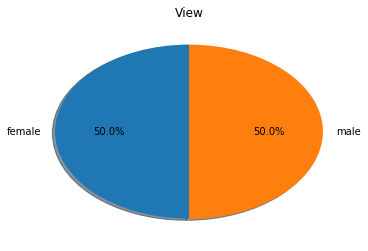

In [14]:
for i in range(22):
    company = dataset[dataset.company == i]
    females = company.gender.sum()
    males = company.gender.count() - females
    sizes = [females, males]
    labels = ["female", "male"]
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90);
    ax1.set_title(companies[i])
    # ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#### Surprisingly the gender distribution in all the companies is perfectly even
##### Is there going to be a even distribution by race as well? Let's check out

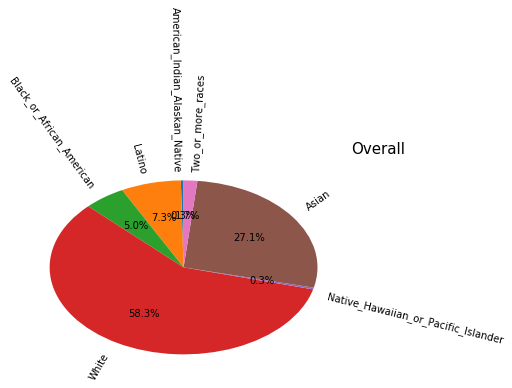

In [30]:
uniqueRace = {'American_Indian_Alaskan_Native':0, 'Latino':0, 'Black_or_African_American':0, 'White':0,
       'Native_Hawaiian_or_Pacific_Islander':0, 'Asian':0,
        'Two_or_more_races':0}
for race in uniqueRace:
    # print(company[company['race'] == race])
    uniqueRace[race] += dataset[dataset['race'] == race]['count'].sum()
#     print(uniqueRace)
fig1, ax1 = plt.subplots()
ax1.pie(x = list(uniqueRace.values()), labels=uniqueRace.keys(), autopct='%1.1f%%',
    startangle=90, labeldistance = 1.1, rotatelabels = True);
font = {'fontsize': 15, 'fontweight' : 100, 'verticalalignment': 'baseline','horizontalalignment': 'left'}
ax1.set_title("Overall", font, loc = 'right');

#### Unsurprising to most, white people make upto 60% of the entire workforce, with the asians being the next highest with only about 30% share. Let's also take a look at the distribution for each company

/Users/adityaarora/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


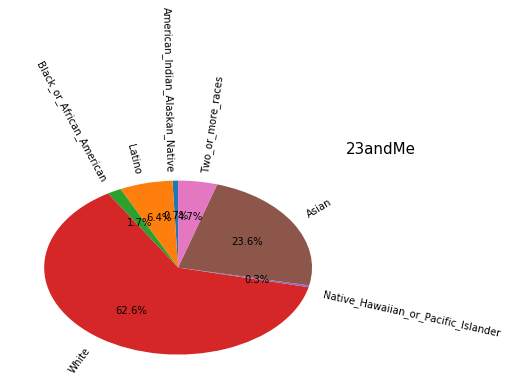

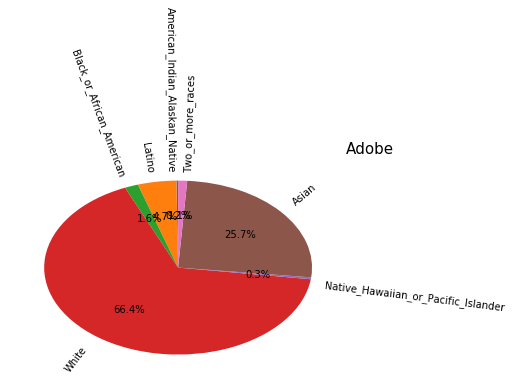

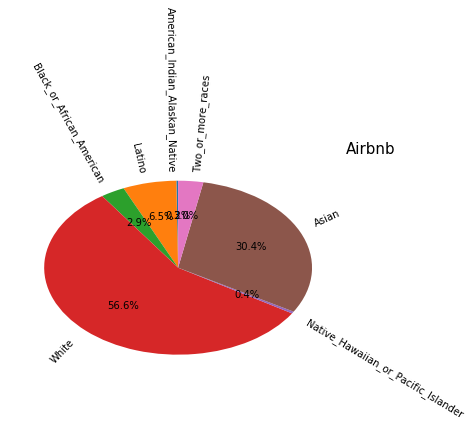

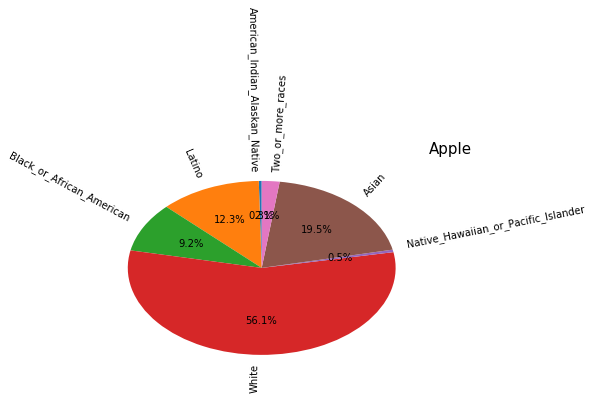

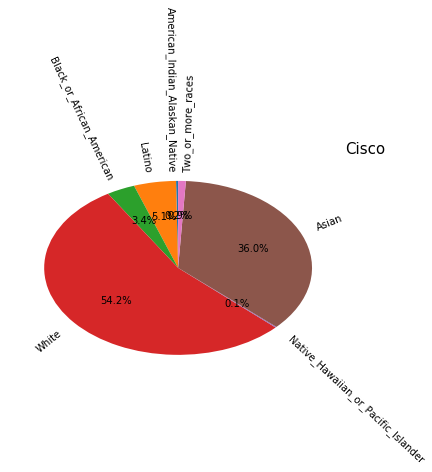

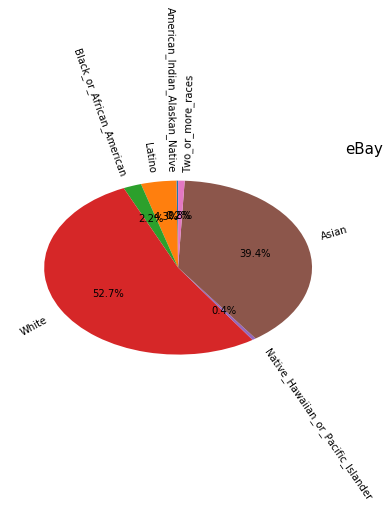

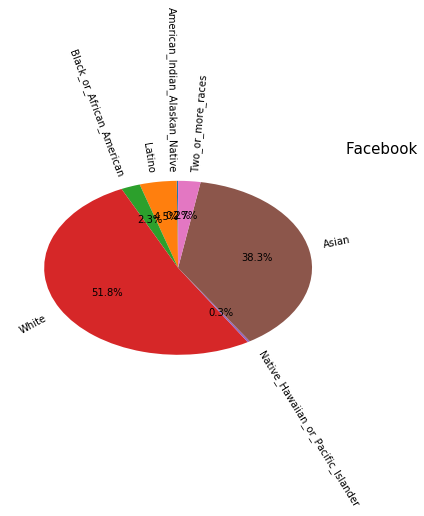

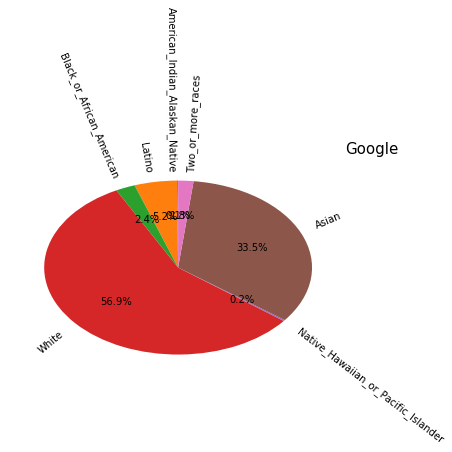

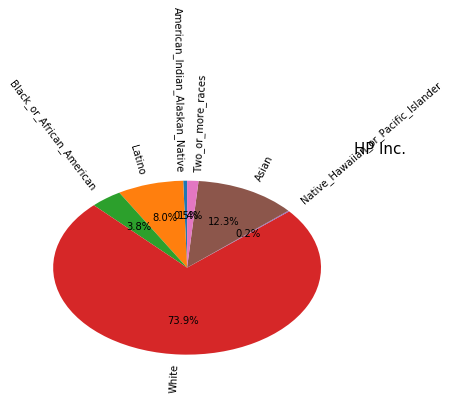

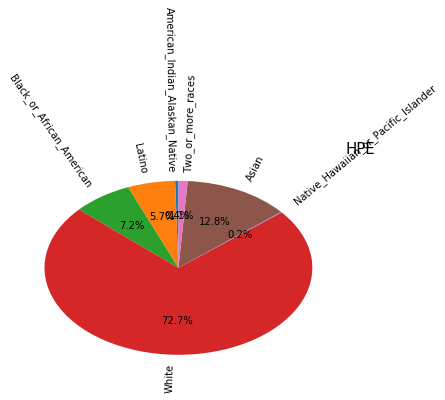

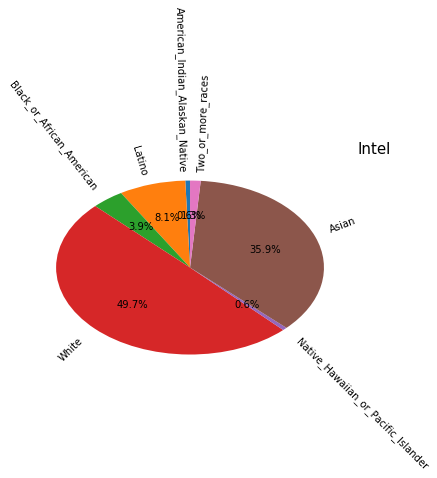

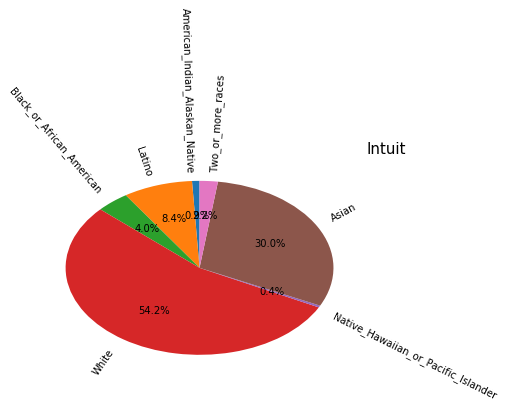

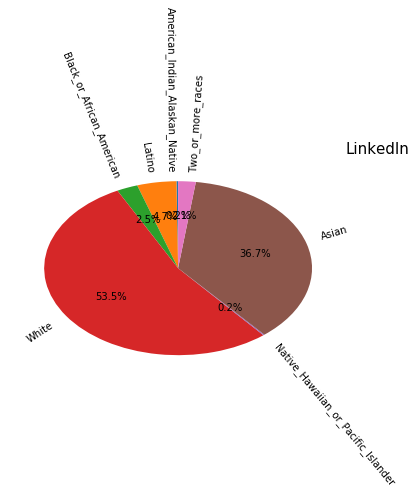

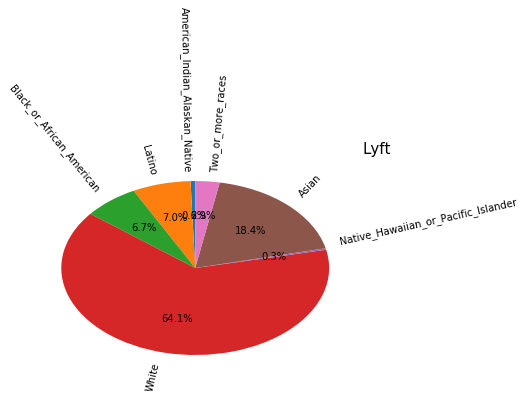

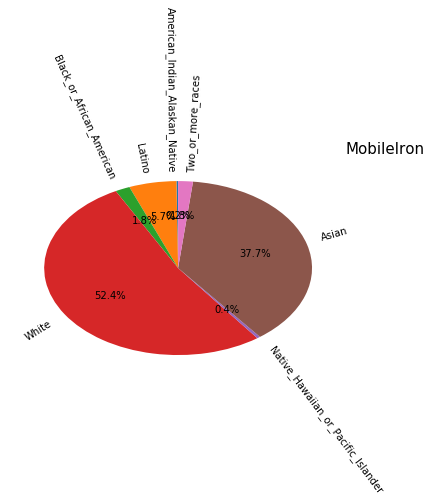

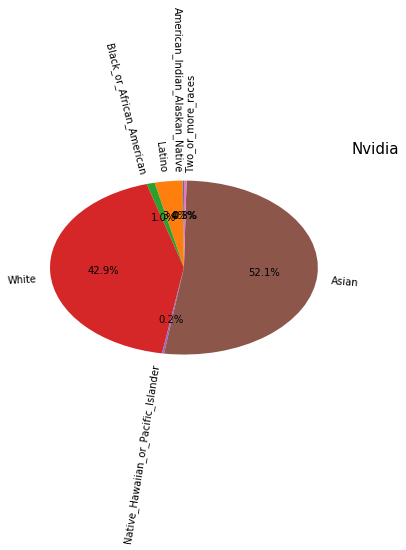

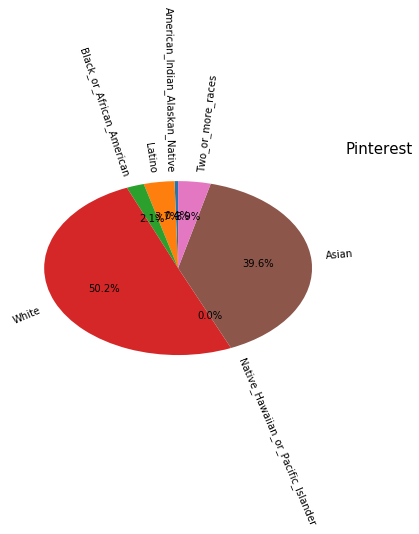

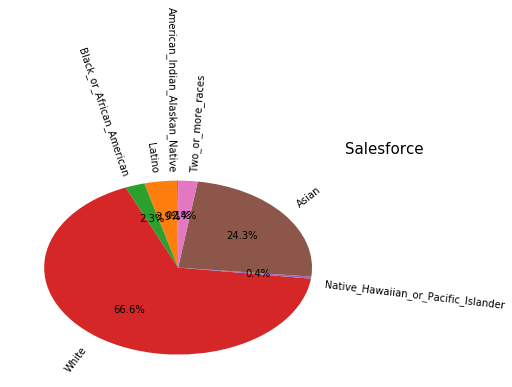

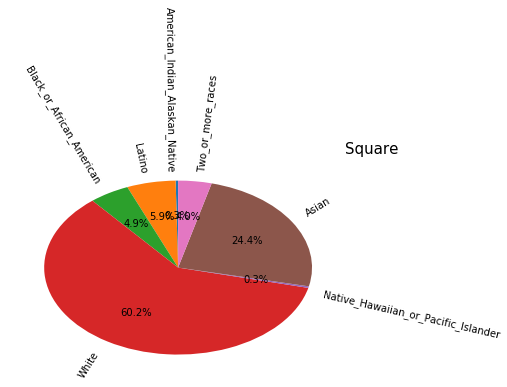

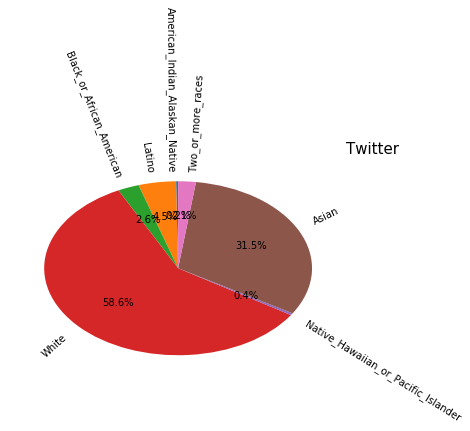

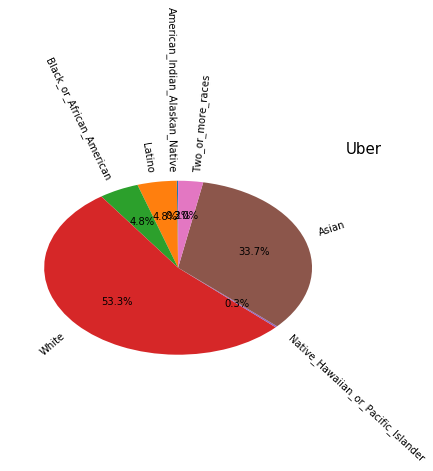

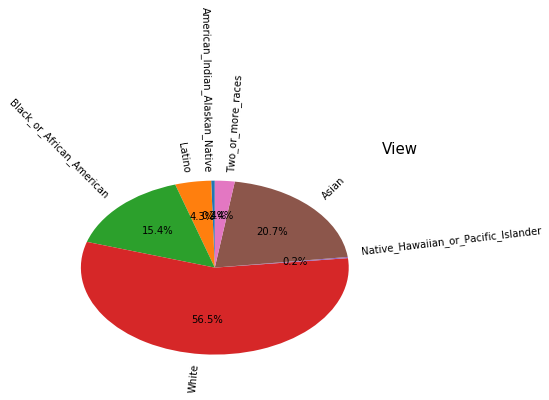

In [36]:
for i in range(22):
    company = dataset[dataset.company == i]
    uniqueRace = {'American_Indian_Alaskan_Native':0, 'Latino':0, 'Black_or_African_American':0, 'White':0,
       'Native_Hawaiian_or_Pacific_Islander':0, 'Asian':0,
        'Two_or_more_races':0}
    for race in uniqueRace:
        # print(company[company['race'] == race])
        uniqueRace[race] += company[company['race'] == race]['count'].sum()
    #     print(uniqueRace)
    fig1, ax1 = plt.subplots()
    ax1.pie(x = list(uniqueRace.values()), labels=uniqueRace.keys(), autopct='%1.1f%%',
        startangle=90, labeldistance = 1.1, rotatelabels = True);
    font = {'fontsize': 15, 'fontweight' : 100, 'verticalalignment': 'baseline','horizontalalignment': 'left'}
    ax1.set_title(companies[i], font, loc = 'right');

#### As clearly seen, the workforce at HP Inc and HPE is predominantly white, with more than 70% share of the workforce. The other distinct trend is the high share of Asians in companies like Facebook, LinkedIn, Cisco, MobileIron each with over 30% of the workforce being asian.

#### The outliers to these trends include Nvidia, with more than 50% of the population being Asian. Pinterest also being one if the outliers with almost 40% of its workforce being Asian